# VISUALIZATION OF EARNINGS BASED ON COLLEGE AND GENDER


It is a fact that there is still a great disparity on how Men and Women are paid all of the world, meaning that women are still earning less than men, with no reasonable explanation other than gender. According to an article realeased by [Business Insider](https://www.businessinsider.com/gender-wage-pay-gap-charts-2017-3), some cities reached a gender pay gap higher than 20%.

Thinking from this perspective, the main goal of the  present project is to explore a dataset of job outcomes of students who graduated from college between 2010 and 2012. The data was originally released by [American Community Survey (ACS)](https://www.census.gov/programs-surveys/acs/), which conducts surveys to help local officials, community leaders, and businesses understand the changes taking place in their communities. The data was then cleaned by FiveThirtyEight and released on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

Our purpose is to explore the dataset in order to find any pattern on earnings for men and women, based on their respective majors and considering the gender factor. To do so, we are going to use data visualization tools, such as pandas and matplotlib libraries, and also some basic exploring techniques.

## Dataset dictionary

|**Header**|**Description**|
|:------:|:----------:|
|Rank|Rank by median earnings|
|Major_code|Major code, FO1DP in ACS PUMS|
|Major|Major description|
|Major_category|Category of major from Carnevale et al|
|Total|Total number of people with major|
|Sample_size|Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|Male graduates|
|Women|Female graduates|
|ShareWomen|Women as share of total|
|Employed|Number employed (ESR == 1 or 2)|
|Full_time|Employed 35 hours or more|
|Part_time|Employed less than 35 hours|
|Full_time_year_round|Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed|Number unemployed (ESR == 3)|
|Unemployment_rate|Unemployed / (Unemployed + Employed)|
|Median|Median earnings of full-time, year-round workers|
|P25th|25th percentile of earnings|
|P75th|75th percentile of earnings|
|College_jobs|Number with job requiring a college degree|
|Non_college_jobs|Number with job not requiring a college degree|
|Low_wage_jobs|Number in low-wage service jobs|

## STEP 1: Importing libraries and Exploring dataset

To initialize our analysis, it is necessary to import some essential libraries for data analysis, such as __pandas__ and __matplotlib__. It is also important to make some previous analysis of our dataset using basic exploring techniques. 

When importing matplotlib, we have to run the Jupyter magic __%matplotlib inline__ either. This tool is very important since it allows Jupyter to plot our graphs inline.

- __Importing libraries__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- __Reading the dataset__

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

- __Exploring the dataset__

In [3]:
raw_data_count = recent_grads.shape
raw_data_count

(173, 21)

In [4]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
recent_grads.describe(include = 'all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,PRE-LAW AND LEGAL STUDIES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [8]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

### OBSERVATIONS

From the code lines above, we can point some observations:

- The __recent_grads__ dataset contais 173 raw data, which are represented by different majors, and 21 attributes represented by columns;

- From the statistical description and dataset information, it is possible to notice that there are one missing value for __Total__, __Men__, __Women__ and __ShareWomen__ columns. In code line below, we can see that it is the same missing value for all the four columns (for Food Science major). Thus, to make our analysis more precise, we are going to remove this row.

In [9]:
recent_grads[recent_grads['Women'].isnull()][['Major', 'Total', 'Men', 'Women', 'ShareWomen']]

,Major,Total,Men,Women,ShareWomen
21,FOOD SCIENCE,NaN,NaN,NaN,NaN


- __Droping row with null values__

In [10]:
recent_grads.dropna(axis = 0, inplace = True)
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

## STEP 2: Constructing graphs for data visualization

In this step, we are going to create different kind of plots (scatter, histogram and bar plots) aiming to find any patterns on then. To do so, we are using __Pandas for plotting the graphs__, since it is a great tool that simplifies graphs construction.

- __GENERATING SCATTER PLOTS FOR DIFFERENT COLUMNS__

- Full_time vs Median

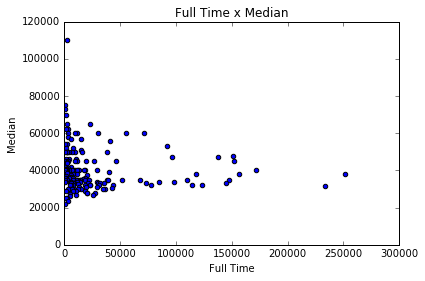

In [11]:
ax = recent_grads.plot(x = 'Full_time', y  = 'Median', kind = 'scatter')
ax.set_title('Full Time x Median')
ax.set_xlabel('Full Time')
ax.set_xlim(0,)
ax.set_ylabel('Median')

- ShareWomen vs Unemployment_rate

(0, 0.2)

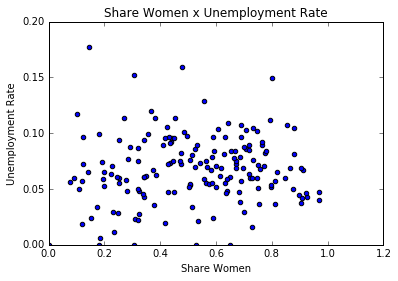

In [12]:
# ShareWomen and Unemployment_rate

ax = recent_grads.plot(x = 'ShareWomen', y  = 'Unemployment_rate', kind = 'scatter')
ax.set_title('Share Women x Unemployment Rate')
ax.set_xlabel('Share Women')
ax.set_xlim(0,)
ax.set_ylabel('Unemployment Rate')
ax.set_ylim(0,)

- Men vs Median

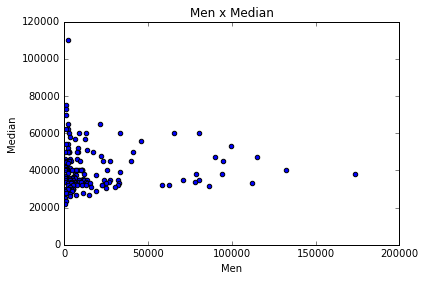

In [13]:
ax = recent_grads.plot(x = 'Men', y  = 'Median', kind = 'scatter')
ax.set_title('Men x Median')
ax.set_xlabel('Men')
ax.set_xlim(0,)
ax.set_ylabel('Median')


- Women vs Median

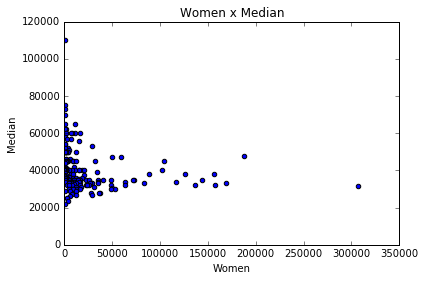

In [14]:
ax = recent_grads.plot(x = 'Women', y  = 'Median', kind = 'scatter')
ax.set_title('Women x Median')
ax.set_xlabel('Women')
ax.set_xlim(0,)
ax.set_ylabel('Median')

In [15]:
# answering to the question from DQ
'''
1) Do students in more popular majors make more money? (total x median)
2) Do students that majored in subjects that were majority female make more money? (sharewomen x median)
3) Is there any link between the number of full-time employees and median salary?
'''

'\n1) Do students in more popular majors make more money? (total x median)\n2) Do students that majored in subjects that were majority female make more money? (sharewomen x median)\n3) Is there any link between the number of full-time employees and median salary?\n'

- Total vs Median

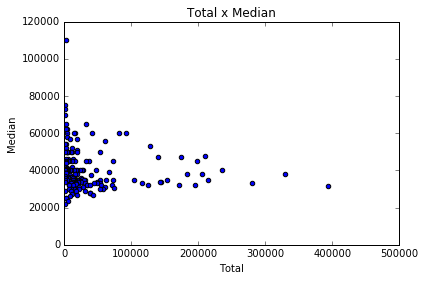

In [16]:
ax = recent_grads.plot(x = 'Total', y = 'Median', kind = 'scatter')
ax.set_title('Total x Median')
ax.set_xlabel('Total')
ax.set_xlim(0,)
ax.set_ylabel('Median')

- ShareWomen vs Median

(0, 120000.0)

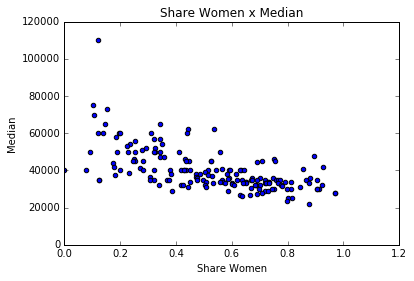

In [17]:
ax = recent_grads.plot(x = 'ShareWomen', y  = 'Median', kind = 'scatter')
ax.set_title('Share Women x Median')
ax.set_xlabel('Share Women')
ax.set_xlim(0,)
ax.set_ylabel('Median')
ax.set_ylim(0,)

### OBSERVATIONS

1) There is not a clear relationship between the most popular majors and salarys according to the __Total x Median__ plot. Actually, it is possible to notice that less popular majors have a high variety of salary, ranging from \$ 20,000 to \$ 80,000 (with a single outlier reaching over \$ 120,000). As the total of students increase in some majors, it is possible to observe that the median salary becomes stable, close to \$ 40,000.

2) Analyzing __Men x Median__ and __Women x Median__ plots, we can see that there is no significantly difference between both. However, the __ShareWomen x Median__ graph shows us a weak negative correlation between these two parameters which means that majors with more female than male students tends to have lower wages. 

3) From the __Full Time x Median__ scatter plot, it is possible to conclude that there is not a direct relationship between Full time works and Median Salary. Instead, just like the plot from the first observation, we can observe a high variation of salary for non-Full time employers and some stability in salary as the number of full time works increase.

- __GENERATING HISTOGRAMS FOR "SHAREWOMEN" AND "MEDIAN" COLUMNS__

In [18]:
# working with histograms(Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, Women)

In [19]:
# answering to some questions
'''
What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?
'''

"\nWhat percent of majors are predominantly male? Predominantly female?\nWhat's the most common median salary range?\n"

- ShareWomen

(-0.0019690000000000003, 0.0969]     3
(0.0969, 0.194]                     14
(0.194, 0.291]                      16
(0.291, 0.388]                      22
(0.388, 0.484]                      19
(0.484, 0.581]                      21
(0.581, 0.678]                      25
(0.678, 0.775]                      29
(0.775, 0.872]                      11
(0.872, 0.969]                      12
Name: ShareWomen, dtype: int64


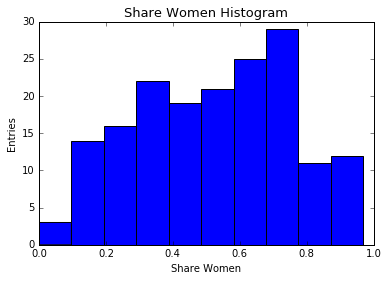

In [20]:
ax = recent_grads['ShareWomen'].hist(grid = False, bins = 10)
ax.set_xlabel('Share Women')
ax.set_ylabel('Entries')
ax.set_title('Share Women Histogram', fontsize = 13)
print(recent_grads['ShareWomen'].value_counts(bins = 10).sort_index())

- Median

(21911.999, 30800.0]    24
(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(74800.0, 83600.0]       1
(83600.0, 92400.0]       0
(92400.0, 101200.0]      0
(101200.0, 110000.0]     1
Name: Median, dtype: int64


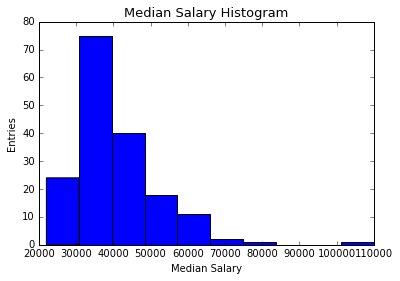

In [21]:
ax = recent_grads['Median'].hist(grid = False)
ax.set_xlabel('Median Salary')
ax.set_ylabel('Entries')
ax.set_title('Median Salary Histogram', fontsize = 13)
print(recent_grads['Median'].value_counts(bins = 10).sort_index())

### OBSERVATIONS

1) According to the histogram and the analysis above, about 44% of the majors are predominantly frequented by male student against 56% of the majors with predominance of female students. Despite that, we could see in the previous observations that graduate Women have slightly lower salaries than Men.

2) It also can be observed from the second histogram that the most commom Median Salary range from \$ 30,000 to \$ 40,000 (about 44%).

- __GENERATING SCATTER MATRIX FOR TOTAL VS MEDIAN, SHAREWOMEN VS MEDIAN AND FULL_TIME VS MEDIAN__

In order to work with scatter matrix, we have to import it from pandas.plotting, as shown below.

In [22]:
# importing scatter_matrix

from pandas.plotting import scatter_matrix

# some questions
```
Do students in more popular majors make more money?
Do students that majored in subjects that were majority female make more money?
Is there any link between the number of full-time employees and median salary?
What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?
```

- __Total vs Median__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35fd987400>,
      dtype=object)

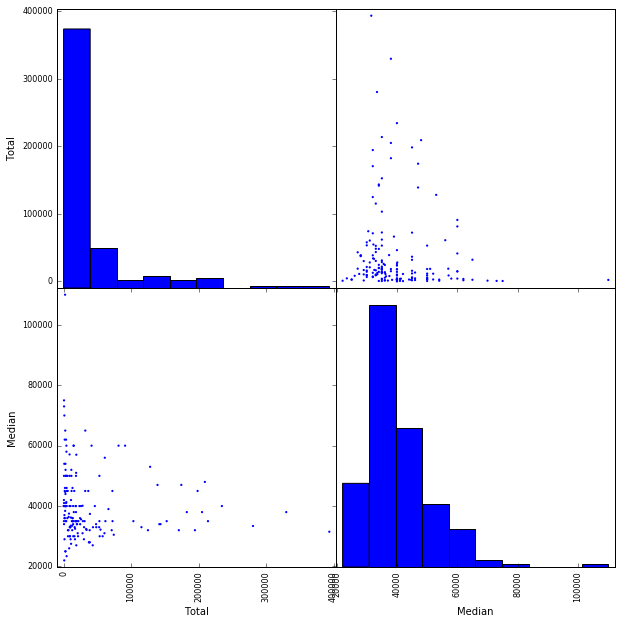

In [27]:
scatter_matrix(recent_grads[['Total', 'Median']], alpha = 1, figsize = (10, 10))

- __ShareWomen vs Median__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35fdc78b38>,
      dtype=object)

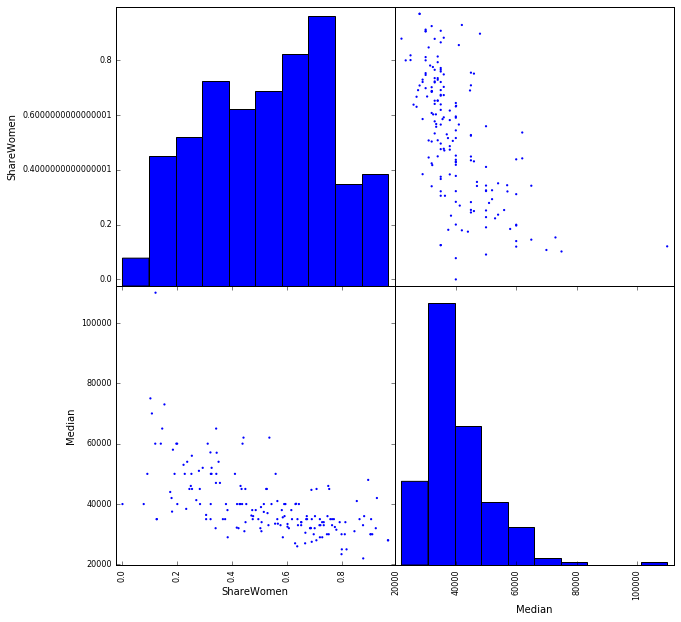

In [24]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], alpha = 1, figsize = (10, 10))

- __Full_time vs Median__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35fdbae748>,
      dtype=object)

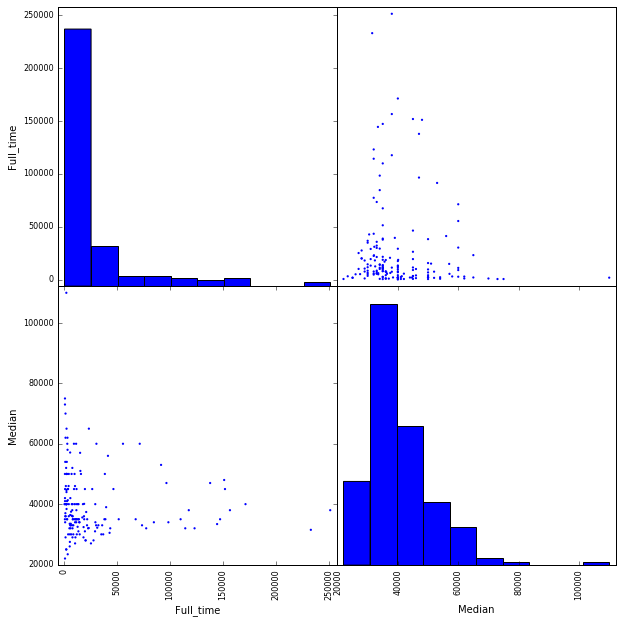

In [25]:
scatter_matrix(recent_grads[['Full_time', 'Median']], alpha = 1, figsize = (10, 10))

### OBSERVATIONS

The scatter matrices above just emphasize our previous discussion by aggregating scatter plots and histograms side by side for better comprehension.

- __GENERATING BAR PLOTS__

To finish our data analysis, we are going to generate bar plots for the 10 majors with higher median salaries and the 10 majors with lower median salaries using the __Major__ and __ShareWomen__ columns. Our main purpose is to compare weather the higher salary majors are predominantly frequented by men or women.

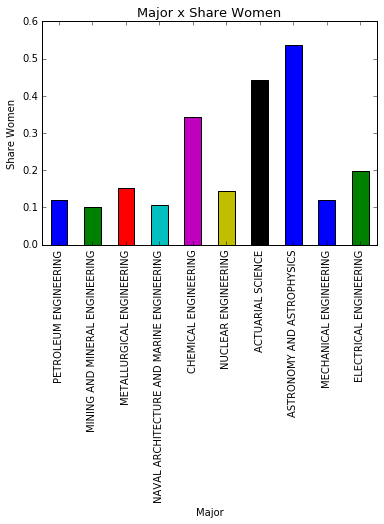

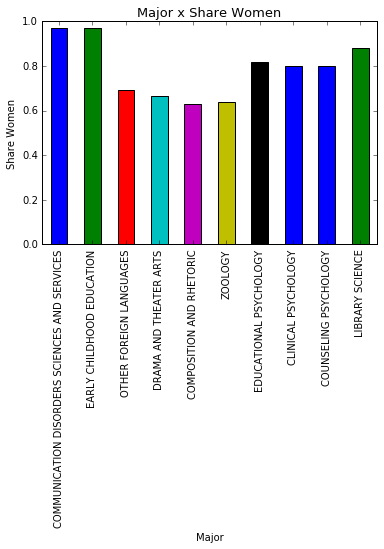

In [26]:
ax1 = recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)
ax1.set_ylabel('Share Women')
ax1.set_title('Major x Share Women', fontsize = 13)
ax2 = recent_grads[-10:].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)
ax2.set_ylabel('Share Women')
ax2.set_title('Major x Share Women', fontsize = 13)

### OBSERVATIONS

We can conclude from the plots above that the majority of high payed majors are frequented mostly by men whereas women students are most likely to frequent majors with lower salaries. Analyzing the reasons why this happen may be complex and it is necessary to observe other external factors which are not in our dataset. However, it is possible to infer that there is a small gap on men and women salaries based on the Recent Grads dataset.